In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = sns.load_dataset('penguins').dropna()
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [9]:
X = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']]
y = df['body_mass_g']

#  RED NEURONAL PARA PREDECIR EL PESO DE PINGUINO

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [16]:
red = Sequential()
entrada = Dense(units=3,activation='relu')
oculta1 = Dense(units=64,activation='relu')
oculta2 = Dense(units=32,activation='relu')
salida = Dense(units=1,activation='relu')

red.add(entrada)
red.add(oculta1)
#red.add(Dropout(0.5))
red.add(oculta2)
red.add(salida)

red

<Sequential name=sequential_1, built=False>

In [17]:
red.compile(
    optimizer= 'adam',
    loss = 'mse',
    metrics = ['mae']
)

## Entrenamiento

In [18]:
history = red.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=1)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 18560052.0000 - mae: 4233.6846 - val_loss: 17813308.0000 - val_mae: 4138.7173
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 19016532.0000 - mae: 4287.0703 - val_loss: 17812092.0000 - val_mae: 4138.5786
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 18775612.0000 - mae: 4254.8906 - val_loss: 17810662.0000 - val_mae: 4138.4155
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 18420590.0000 - mae: 4219.0957 - val_loss: 17808924.0000 - val_mae: 4138.2178
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 19110872.0000 - mae: 4295.6709 - val_loss: 17806712.0000 - val_mae: 4137.9658
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 18692652.0000 - mae: 4250.1787 - val_loss: 17803952.0000 - val_mae: 4137.6523
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 17721840.0000 - mae: 4138.2612 - val_loss: 17800484.0000 - val_mae: 4137.2573
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/ste

## EVALUAMOS LA RED

In [19]:
loss, mae = red.evaluate(X_test, y_test, verbose=0)
print(f"MAE en test: {mae:.2f} gramos")

MAE en test: 618.90 gramos


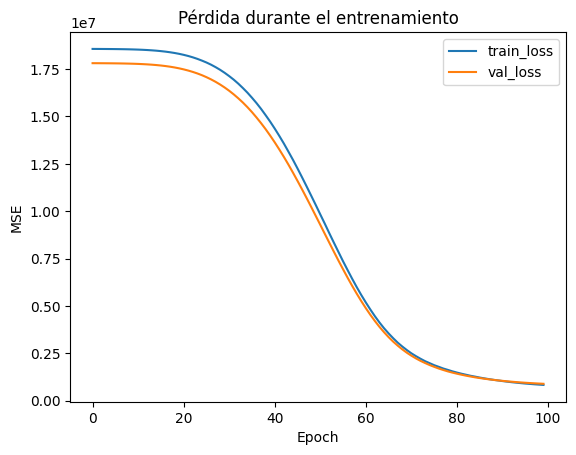

In [20]:
# 📈 Gráfico de pérdida
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.title('Pérdida durante el entrenamiento')
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step


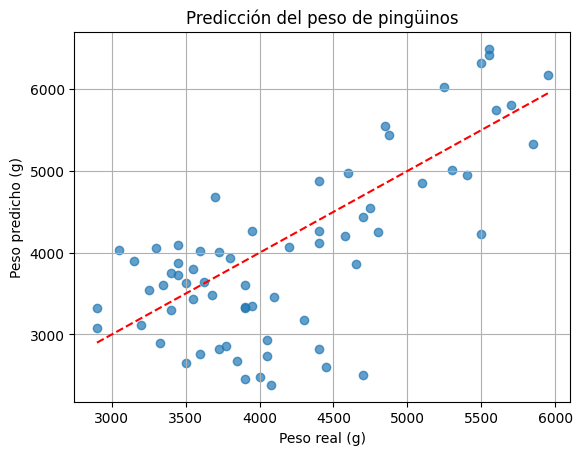

In [22]:
# 🔍 Predicciones
y_pred = red.predict(X_test).flatten()

# 📉 Comparar predicción vs valor real
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Peso real (g)')
plt.ylabel('Peso predicho (g)')
plt.title('Predicción del peso de pingüinos')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.grid(True)
plt.show()